# Single-cell RNA-seq imputation using DeepImpute

Here is a comprehensive tutorial to understand the functionnalities of DeepImpute.

In [190]:
from deepimpute.multinet import MultiNet
import pandas as pd

# Load dataset using pandas
data = pd.read_csv('~/CCI/cellphoneDB/smillie_ibd/smillie_fibs_raw_counts.tsv',sep='\t',index_col=0)
# Transpose matrix as gene as columns and cells as rows
data = data.T
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 24290 cells and 19076 genes


In [191]:
data.head()

,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,...,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa-mir-1199,hsa-mir-6080,hsa-mir-8072,snoU13
N7.LPA.AAACATACCATTTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N7.LPA.AAACGCACCCGATA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
N7.LPA.AAACGCTGTATCGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N7.LPA.AAAGACGAGACAGG,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N7.LPA.AAAGATCTAGTCTG,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Create a DeepImpute multinet

<AxesSubplot:>

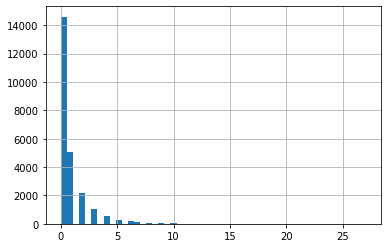

In [192]:
data['IL6ST'].hist(bins=50)

<AxesSubplot:xlabel='IL11', ylabel='IL11RA'>

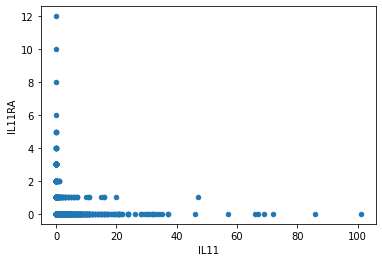

In [60]:
data.plot.scatter('IL11','IL11RA')

In [194]:
# Using default parameters
multinet = MultiNet() 

Using all the cores (32)


In [195]:
# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 64,
        'max_epochs': 200,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 256},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

## Fit the networks

In [196]:
help(multinet.fit)

Help on method fit in module deepimpute.multinet:

fit(raw, cell_subset=1, NN_lim=None, genes_to_impute=None, n_pred=None, ntop=5, minVMR=0.5, mode='random') method of deepimpute.multinet.MultiNet instance



In [209]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

Input dataset is 24290 cells (rows) and 19076 genes (columns)
First 3 rows and columns:
                       7SK  A1BG  A1BG-AS1
N7.LPA.AAACATACCATTTC    0     0         0
N7.LPA.AAACGCACCCGATA    0     0         0
N7.LPA.AAACGCTGTATCGG    0     0         0
2048 genes selected for imputation
Net 0: 538 predictors, 512 targets
Net 1: 510 predictors, 512 targets
Net 2: 563 predictors, 512 targets
Net 3: 473 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 256}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]


/mnt/rstudio/smohammed/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting with 24290 cells
Epoch 1/200
361/361 [==============================] - 2s 4ms/step - loss: 0.7738 - dense_16_loss: 0.1899 - dense_17_loss: 0.1762 - dense_18_loss: 0.1907 - dense_19_loss: 0.2170 - val_loss: 0.3466 - val_dense_16_loss: 0.0863 - val_dense_17_loss: 0.0778 - val_dense_18_loss: 0.0877 - val_dense_19_loss: 0.0947
Epoch 2/200
361/361 [==============================] - 1s 4ms/step - loss: 0.4136 - dense_16_loss: 0.1024 - dense_17_loss: 0.0934 - dense_18_loss: 0.1023 - dense_19_loss: 0.1154 - val_loss: 0.2957 - val_dense_16_loss: 0.0753 - val_dense_17_loss: 0.0663 - val_dense_18_loss: 0.0726 - val_dense_19_loss: 0.0815
Epoch 3/200
361/361 [==============================] - 1s 4ms/step - loss: 0.3562 - dense_16_loss: 0.0888 - dense_17_loss: 0.0812 - dense_18_loss: 0.0872 - dense_19_loss: 0.0990 - val_loss: 0.2746 - val_dense_16_loss: 0.0688 - val_dense_17_loss: 0.0622 - val_dense_18_loss: 0.0682 - val_dense_19_loss: 0.0753
Epoch 4/200
361/361 [===========================

In [63]:
# Using 80% of the data
#multinet.fit(data,cell_subset=0.5,genes_to_impute=['IL11RA','IL11','IL6','IL6R','LIF','LIFR','OSM','OSMR','IL6ST'])

Input dataset is 24290 cells (rows) and 19076 genes (columns)
First 3 rows and columns:
                       7SK  A1BG  A1BG-AS1
N7.LPA.AAACATACCATTTC    0     0         0
N7.LPA.AAACGCACCCGATA    0     0         0
N7.LPA.AAACGCTGTATCGG    0     0         0
The number of input genes is not a multiple of 9. Filling with other genes.
Net 0: 450 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.2}]


/mnt/rstudio/smohammed/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting with 12145 cells
Epoch 1/200
46/46 [==============================] - 1s 6ms/step - loss: 2.1209 - val_loss: 1.6334
Epoch 2/200
46/46 [==============================] - 0s 4ms/step - loss: 1.1792 - val_loss: 0.7011
Epoch 3/200
46/46 [==============================] - 0s 4ms/step - loss: 0.7142 - val_loss: 0.5315
Epoch 4/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6313 - val_loss: 0.4954
Epoch 5/200
46/46 [==============================] - 0s 4ms/step - loss: 0.5840 - val_loss: 0.4664
Epoch 6/200
46/46 [==============================] - 0s 4ms/step - loss: 0.5483 - val_loss: 0.4439
Epoch 7/200
46/46 [==============================] - 0s 4ms/step - loss: 0.5184 - val_loss: 0.4257
Epoch 8/200
46/46 [==============================] - 0s 4ms/step - loss: 0.4914 - val_loss: 0.4070
Epoch 9/200
46/46 [==============================] - 0s 4ms/step - loss: 0.4674 - val_loss: 0.3889
Epoch 10/200
46/46 [==============================] - 0s 4ms/step - loss: 0.4460 - v

In [164]:
# Using 200 cells (randomly selected)
#multinet.fit(data,cell_subset=200)

Input dataset is 24290 cells (rows) and 19076 genes (columns)
First 3 rows and columns:
                       7SK  A1BG  A1BG-AS1
N7.LPA.AAACATACCATTTC    0     0         0
N7.LPA.AAACGCACCCGATA    0     0         0
N7.LPA.AAACGCTGTATCGG    0     0         0
1536 genes selected for imputation
Net 0: 1286 predictors, 512 targets
Net 1: 1222 predictors, 512 targets
Net 2: 1367 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 256}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.2}]
Fitting with 200 cells
Epoch 1/200


/mnt/rstudio/smohammed/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 101ms/step - loss: 2.7562 - dense_7_loss: 0.7935 - dense_8_loss: 1.0013 - dense_9_loss: 0.9614 - val_loss: 2.1634 - val_dense_7_loss: 0.5830 - val_dense_8_loss: 0.7880 - val_dense_9_loss: 0.7924
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 2.6315 - dense_7_loss: 0.7553 - dense_8_loss: 0.9631 - dense_9_loss: 0.9132 - val_loss: 2.0548 - val_dense_7_loss: 0.5493 - val_dense_8_loss: 0.7558 - val_dense_9_loss: 0.7497
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 2.4963 - dense_7_loss: 0.7108 - dense_8_loss: 0.9209 - dense_9_loss: 0.8646 - val_loss: 1.9448 - val_dense_7_loss: 0.5155 - val_dense_8_loss: 0.7230 - val_dense_9_loss: 0.7063
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 2.3643 - dense_7_loss: 0.6661 - dense_8_loss: 0.8793 - dense_9_loss: 0.8188 - val_loss: 1.8336 - val_dense_7_loss: 0.4813 - val_dense_8_loss: 0.6894 - val_dense_9_loss: 0.6629
Epoch 5/200
3/3 [==

In [12]:
# Custom fit
#trainingData = data.iloc[100:250,:]
#multinet.fit(trainingData)

## Imputation

The imputation can be done on any dataset as long as the gene labels are the same

In [198]:
imputedData = multinet.predict(data)

Filling zeros


## Visualization

Text(0, 0.5, 'Imputed Data')

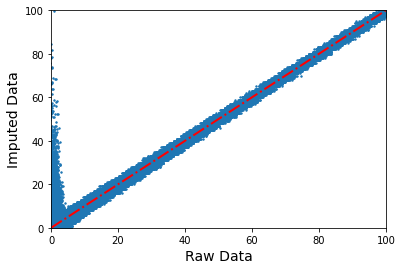

In [199]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)
ax.set_xlabel("Raw Data", size=14)
ax.set_ylabel("Imputed Data", size=14)


## Scoring
Display training metrics (MSE and Pearson's correlation on the test data)

In [210]:
multinet.test_metrics

{'correlation': 0.881067366162446, 'MSE': 0.12226351909623386}

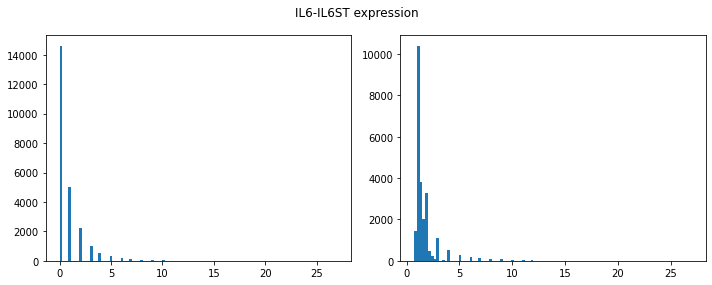

In [211]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle('IL6-IL6ST expression')

axes[0].hist(data['IL6ST'],bins=100, label="IL6ST")
axes[1].hist(imputedData['IL6ST'],bins=100, label="IL6ST")
fig.tight_layout()

(-1.0, 10.0)

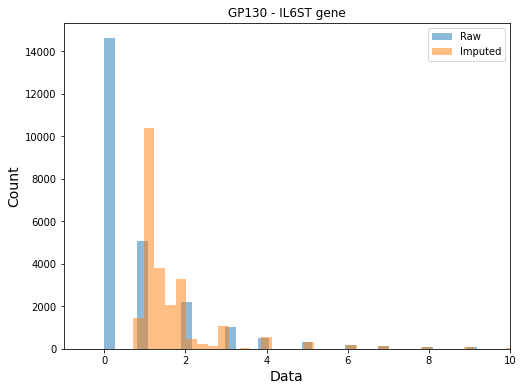

In [212]:
plt.figure(figsize=(8,6))
plt.hist(data['IL6ST'], bins=100, alpha=0.5, label="Raw")
plt.hist(imputedData['IL6ST'], bins=100, alpha=0.5, label="Imputed")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("GP130 - IL6ST gene")
plt.legend(loc='upper right')
plt.xlim(-1, 10)

(-1.0, 10.0)

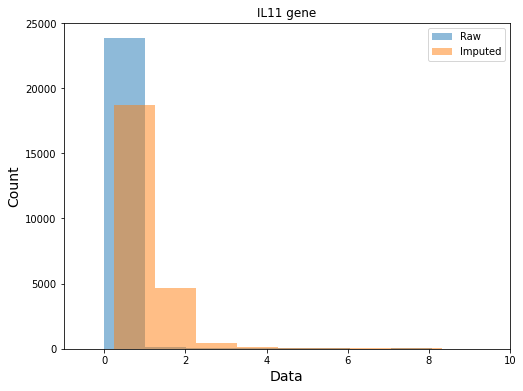

In [213]:
plt.figure(figsize=(8,6))
plt.hist(data['IL11'], bins=100, alpha=0.5, label="Raw")
plt.hist(imputedData['IL11'], bins=100, alpha=0.5, label="Imputed")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("IL11 gene")
plt.legend(loc='upper right')
plt.xlim(-1, 10)

(-1.0, 10.0)

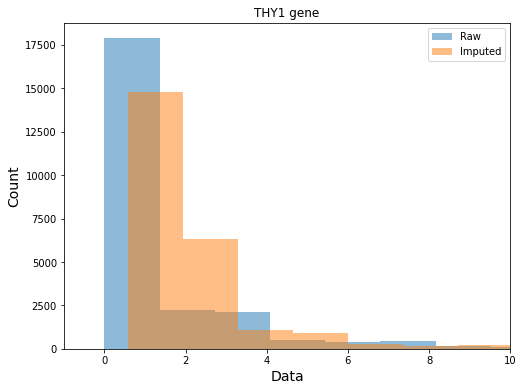

In [216]:
plt.figure(figsize=(8,6))
plt.hist(data['THY1'], bins=100, alpha=0.5, label="Raw")
plt.hist(imputedData['THY1'], bins=100, alpha=0.5, label="Imputed")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("THY1 gene")
plt.legend(loc='upper right')
plt.xlim(-1, 10)

Text(0.5, 1.0, 'IL11')

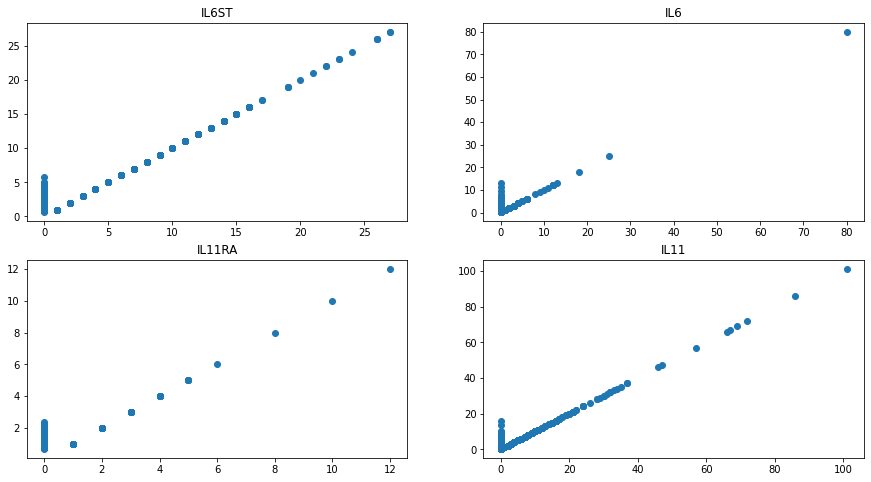

In [214]:
figure, axis = plt.subplots(2, 2,figsize=(15, 8))
  
axis[0, 0].scatter(data['IL6ST'], imputedData['IL6ST'])
axis[0, 0].set_title("IL6ST")
  
axis[0, 1].scatter(data['IL6'], imputedData['IL6'])
axis[0, 1].set_title("IL6")
  
axis[1, 0].scatter(data['IL11RA'], imputedData['IL11RA'])
axis[1, 0].set_title("IL11RA")
  
axis[1, 1].scatter(data['IL11'], imputedData['IL11'])
axis[1, 1].set_title("IL11")

In [205]:
# Save model
import json
#output='smillie_deepImpute.json'
type(multinet)

deepimpute.multinet.MultiNet

In [206]:
from keras.models import load_model
load=load_model(output)

OSError: No file or directory found at smillie_deepImpute.json

In [207]:
import os
os.listdir('.')

['test.csv',
 'smillie_deepimpute.ipynb',
 '.ipynb_checkpoints',
 'notebook_example.ipynb']

In [215]:
imputedData.to_csv("~/CCI/cellphoneDB/smillie_ibd/smillie_fibs_raw_counts_imputed.tsv", sep="\t")

In [79]:
(imputedData.A1BG==0).sum()

24193

In [100]:
imputedData['IL11RA'].isna().value_counts()

False    24290
Name: IL11RA, dtype: int64

In [101]:
data['CCL11'].count()

24290

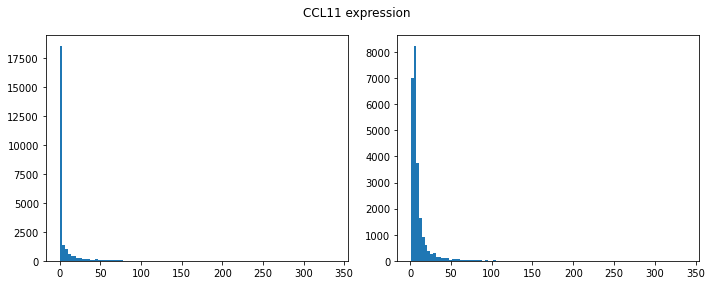

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle('CCL11 expression')

axes[0].hist(data['CCL11'],bins=100, label="CCL11")
axes[1].hist(imputedData['CCL11'],bins=100, label="CCL11")
fig.tight_layout()

In [172]:
def plot_hist_scatter(gene):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
    fig.suptitle(gene + " - " + "gene expression")

    axes[0,0].hist(data[gene],bins=100, label=str(gene))
    axes[0,0].set_title('Raw')
    axes[0,1].hist(imputedData[gene],bins=100, label=gene)
    axes[0,1].set_title('Imputed')
    axes[1,0].scatter(data[gene], imputedData[gene])
    axes[1,0].set_xlabel('Raw')
    axes[1,0].set_ylabel('Imputed')
    axes[1,1].hist(imputedData[gene],bins=100, label=gene)
    fig.tight_layout()

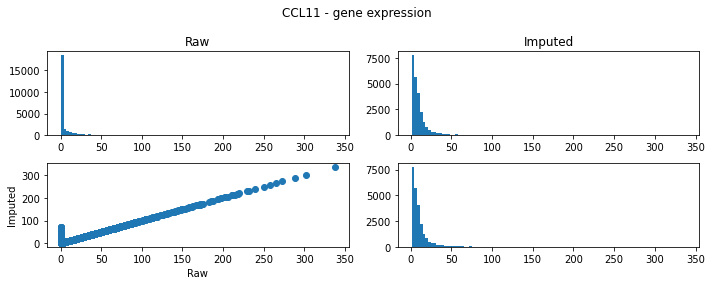

In [173]:
plot_hist_scatter(gene='CCL11')

'' was not found in history, as a file, url, nor in the user namespace.
